# 1. From the Dataset/PabloTask_AggregatedDataframe.csv file, approximate each column representing human flow data to a normal distribution and convert the values into Z-scores based on that distribution.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

기준일ID


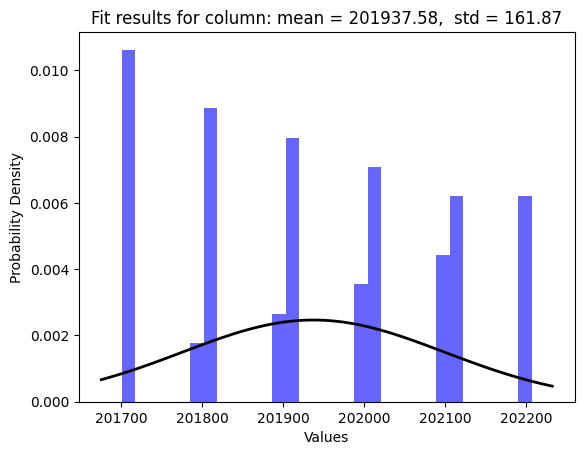

----------------------------------------------------------------------
행정동코드


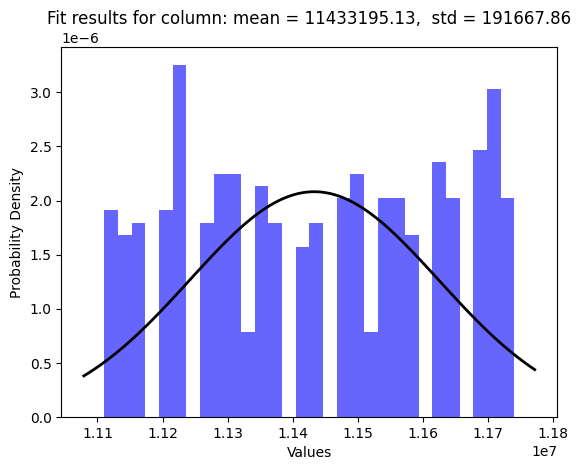

----------------------------------------------------------------------
총생활인구수


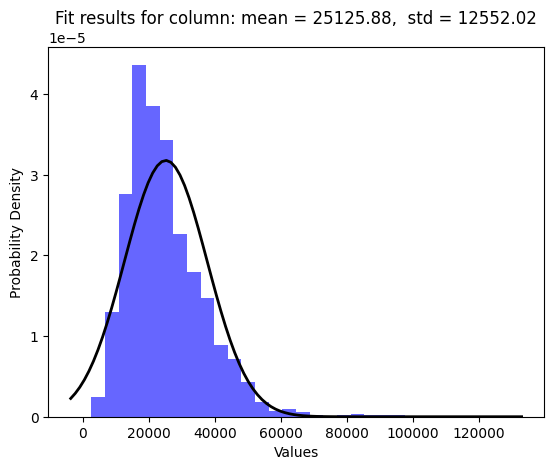

----------------------------------------------------------------------
남자0세부터9세생활인구수


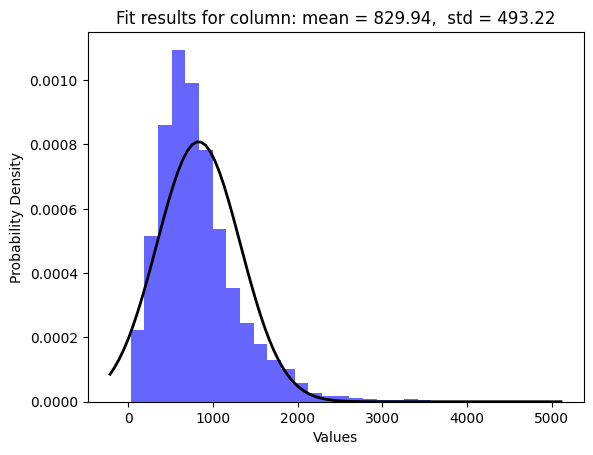

----------------------------------------------------------------------
남자10세부터14세생활인구수


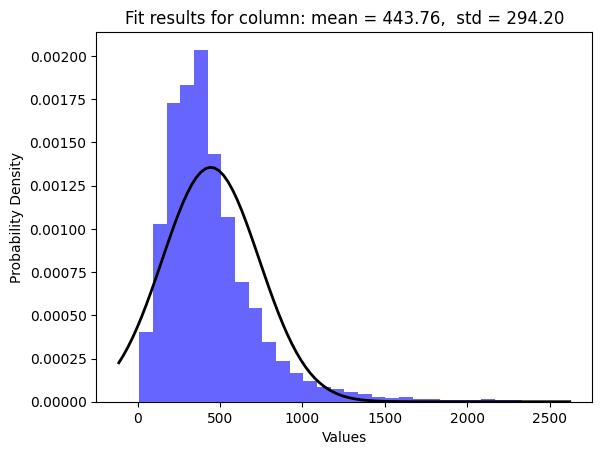

----------------------------------------------------------------------
남자15세부터19세생활인구수


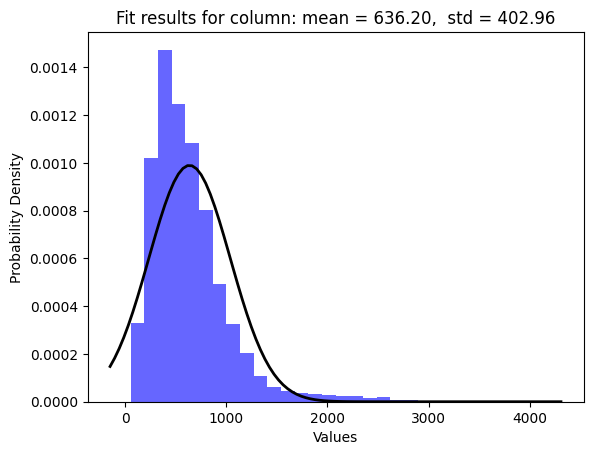

----------------------------------------------------------------------
남자20세부터24세생활인구수


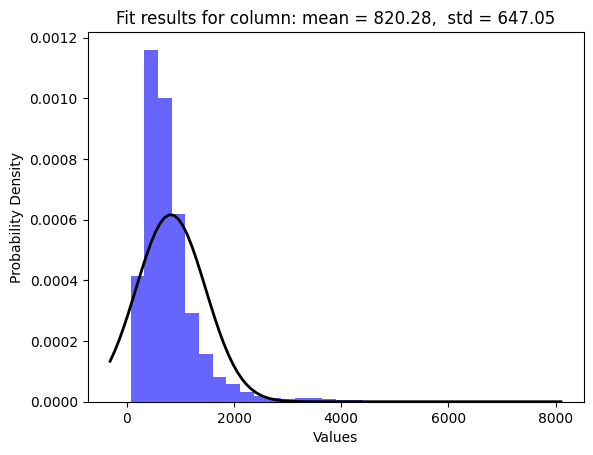

----------------------------------------------------------------------
남자25세부터29세생활인구수


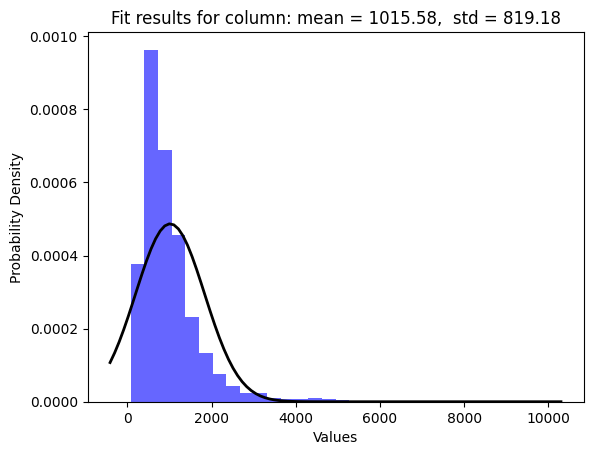

----------------------------------------------------------------------
남자30세부터34세생활인구수


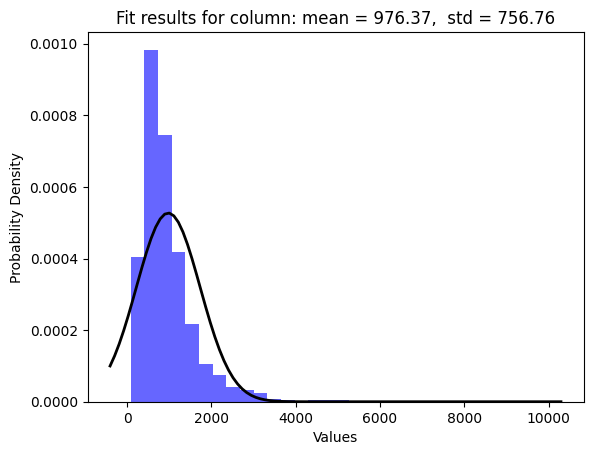

----------------------------------------------------------------------
남자35세부터39세생활인구수


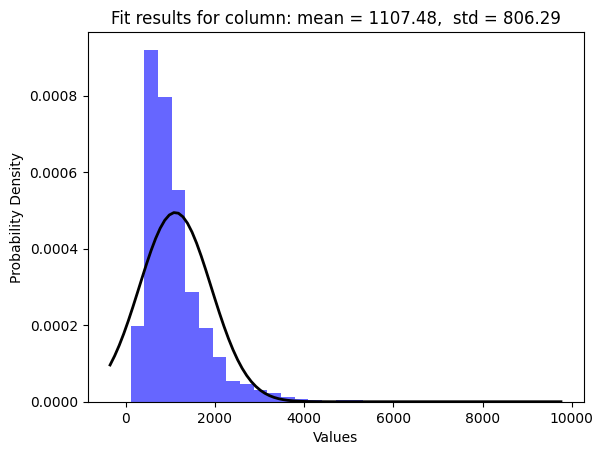

----------------------------------------------------------------------
남자40세부터44세생활인구수


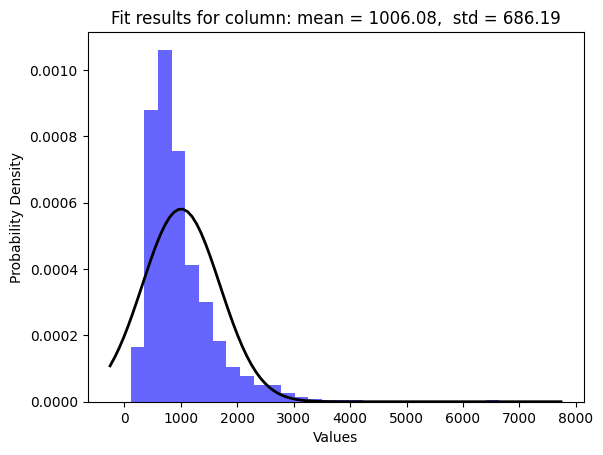

----------------------------------------------------------------------
남자45세부터49세생활인구수


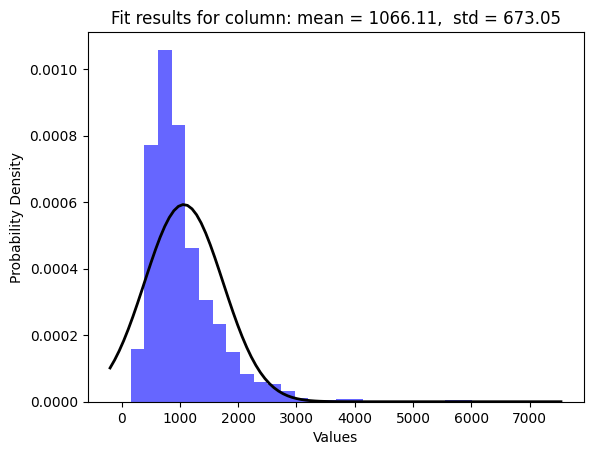

----------------------------------------------------------------------
남자50세부터54세생활인구수


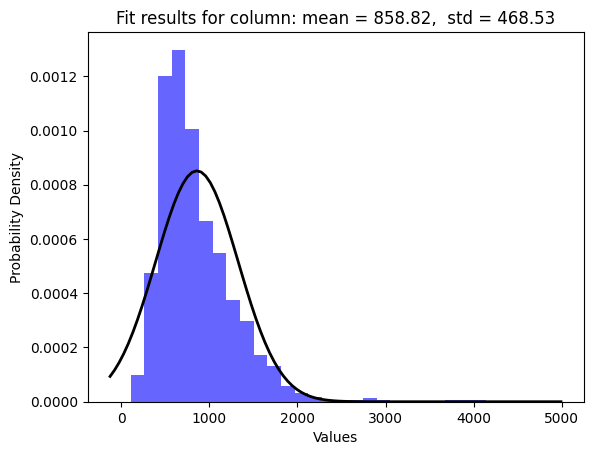

----------------------------------------------------------------------
남자55세부터59세생활인구수


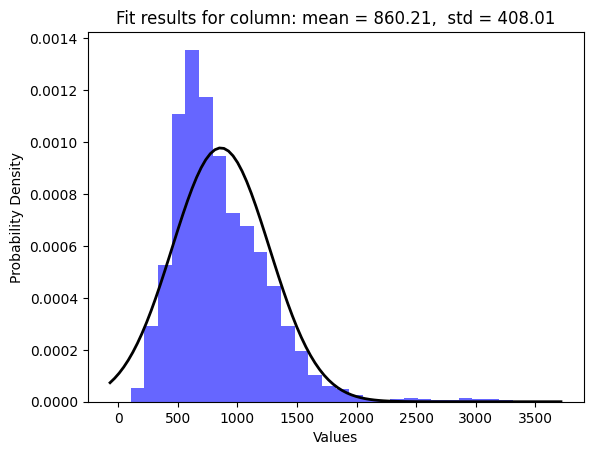

----------------------------------------------------------------------
남자60세부터64세생활인구수


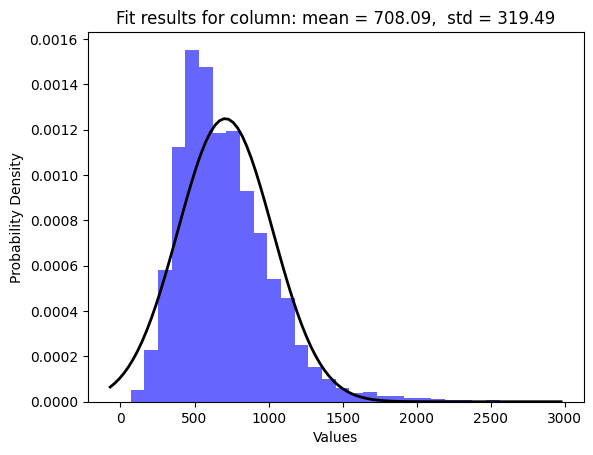

----------------------------------------------------------------------
남자65세부터69세생활인구수


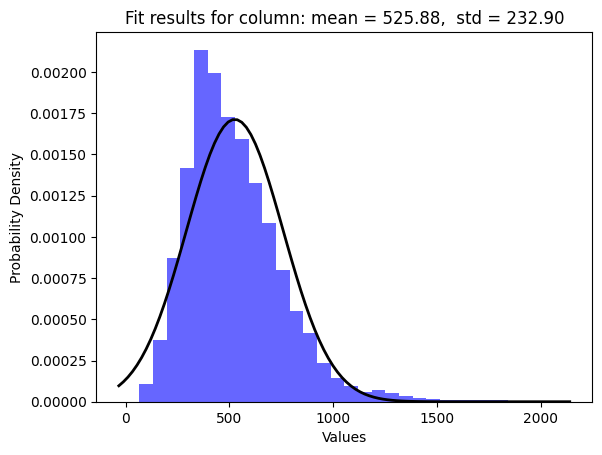

----------------------------------------------------------------------
남자70세이상생활인구수


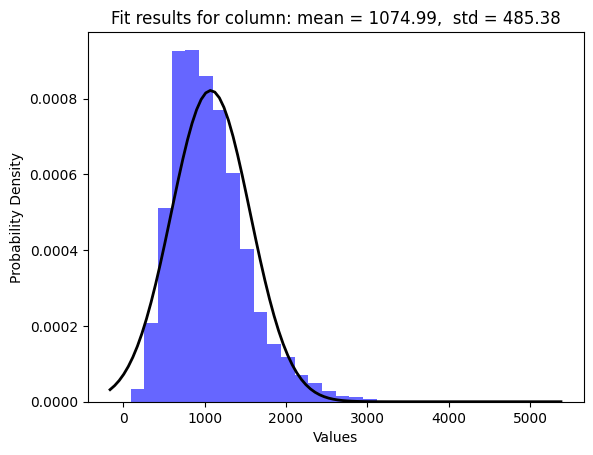

----------------------------------------------------------------------
여자0세부터9세생활인구수


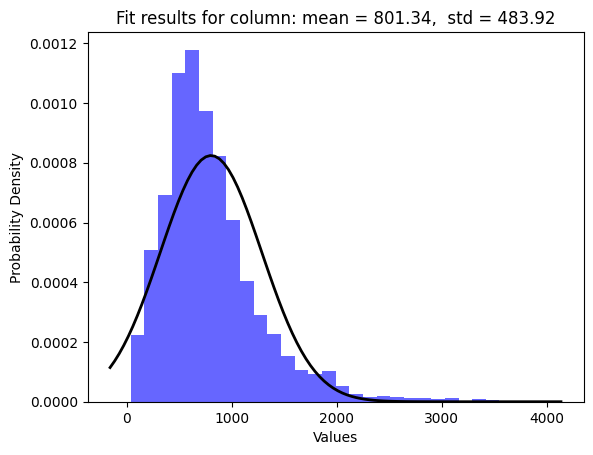

----------------------------------------------------------------------
여자10세부터14세생활인구수


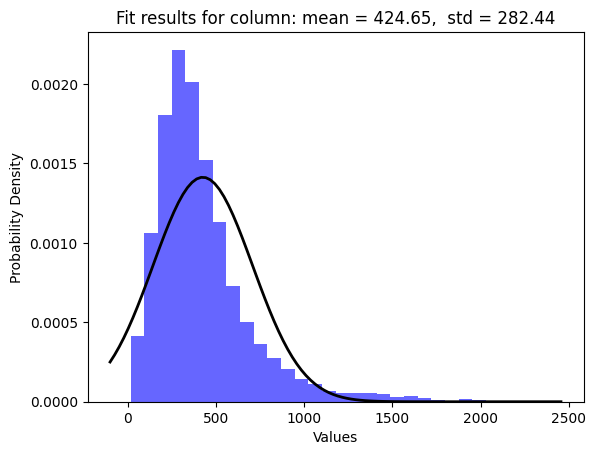

----------------------------------------------------------------------
여자15세부터19세생활인구수


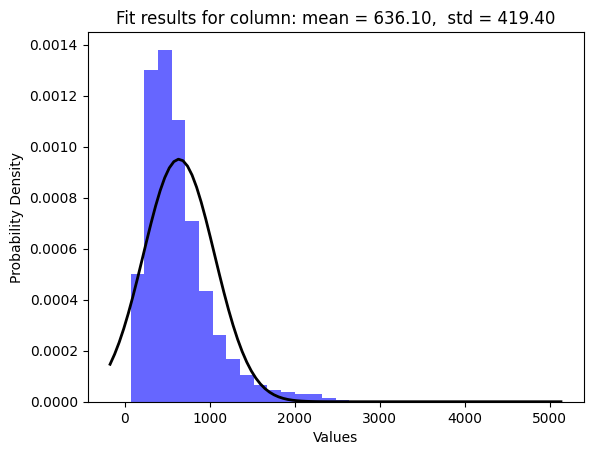

----------------------------------------------------------------------
여자20세부터24세생활인구수


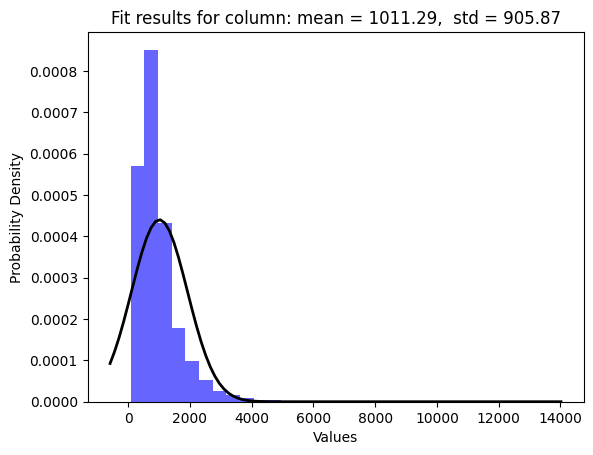

----------------------------------------------------------------------
여자25세부터29세생활인구수


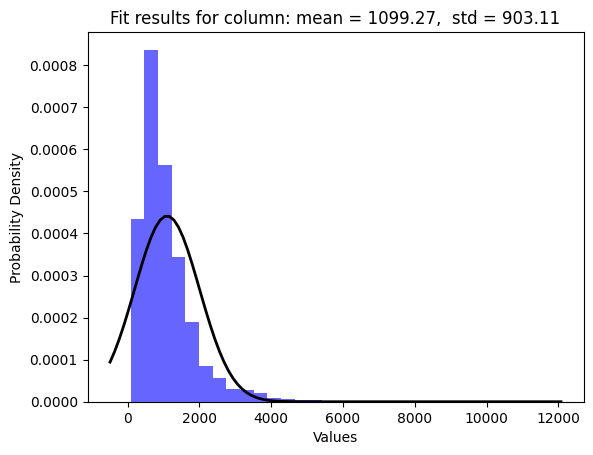

----------------------------------------------------------------------
여자30세부터34세생활인구수


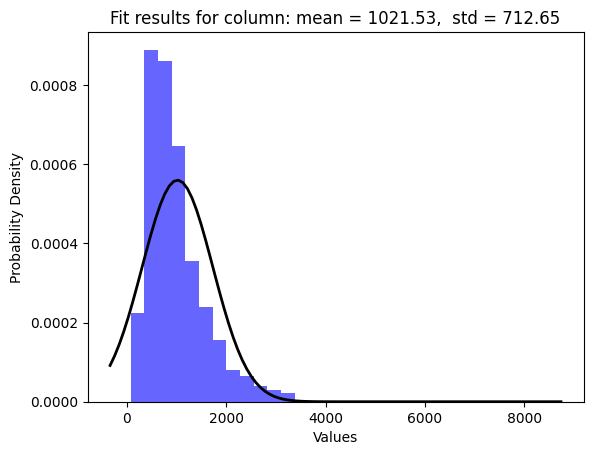

----------------------------------------------------------------------
여자35세부터39세생활인구수


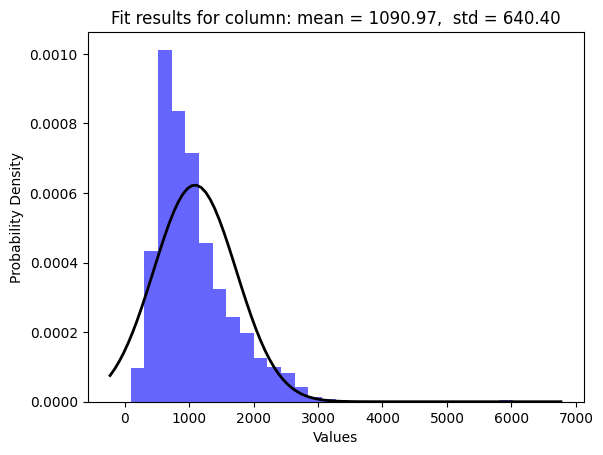

----------------------------------------------------------------------
여자40세부터44세생활인구수


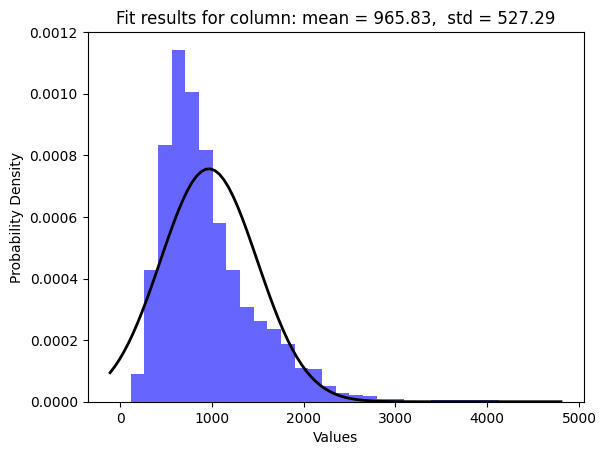

----------------------------------------------------------------------
여자45세부터49세생활인구수


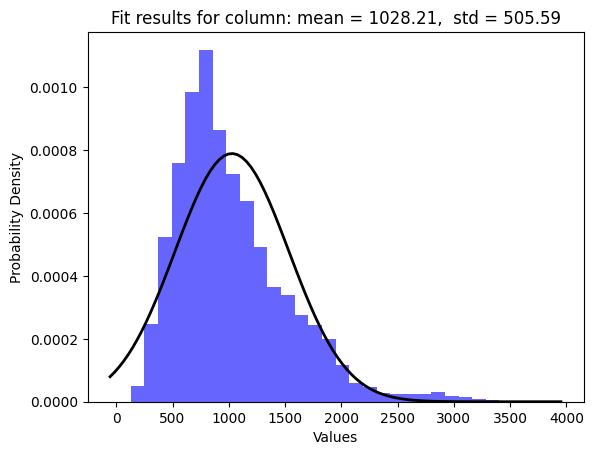

----------------------------------------------------------------------
여자50세부터54세생활인구수


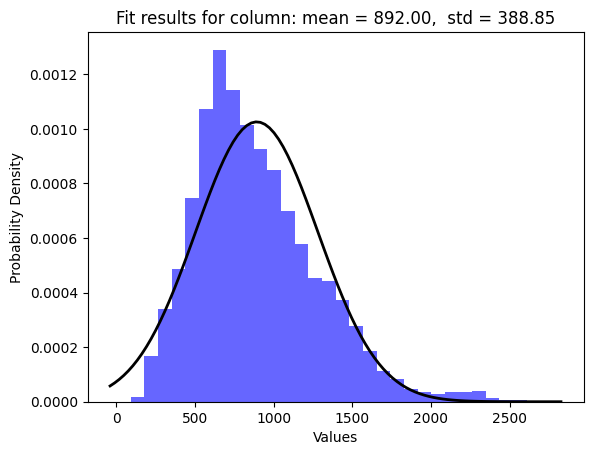

----------------------------------------------------------------------
여자55세부터59세생활인구수


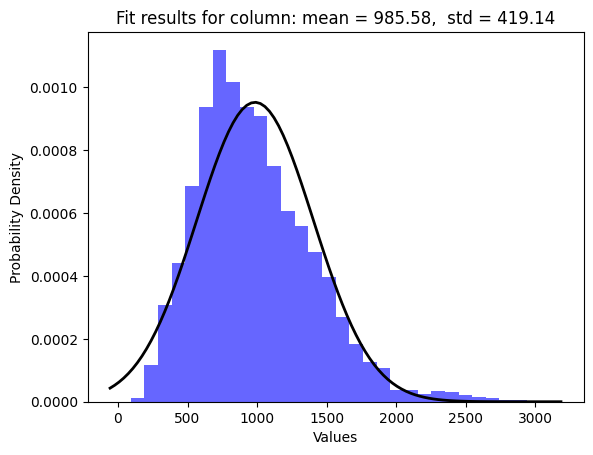

----------------------------------------------------------------------
여자60세부터64세생활인구수


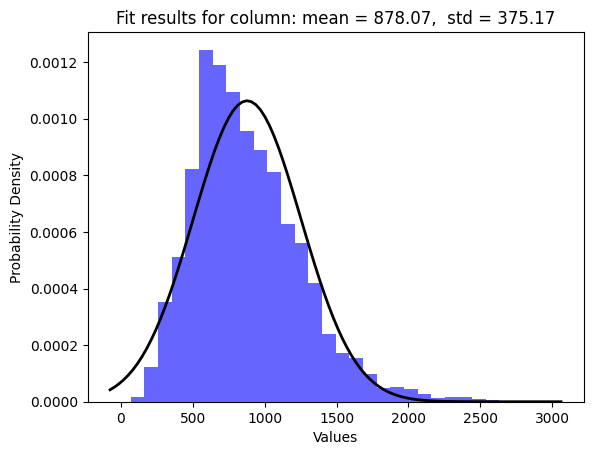

----------------------------------------------------------------------
여자65세부터69세생활인구수


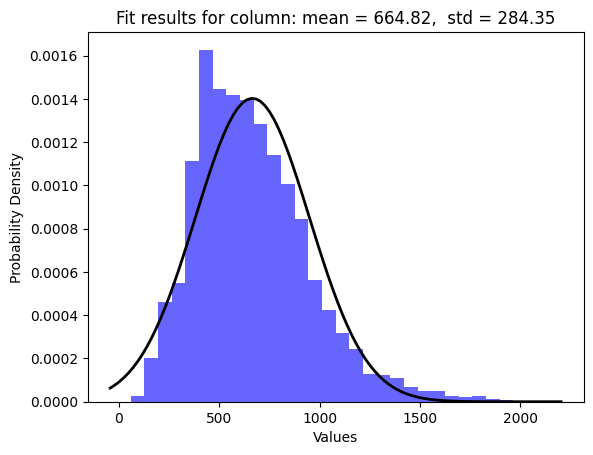

----------------------------------------------------------------------
여자70세이상생활인구수


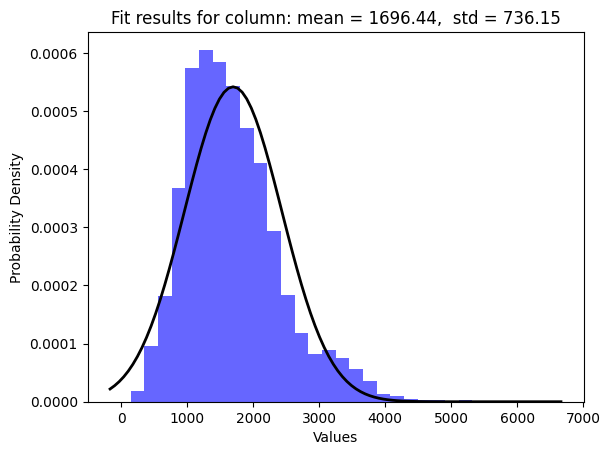

----------------------------------------------------------------------
총생활인구수_LONG_FOREIGNER


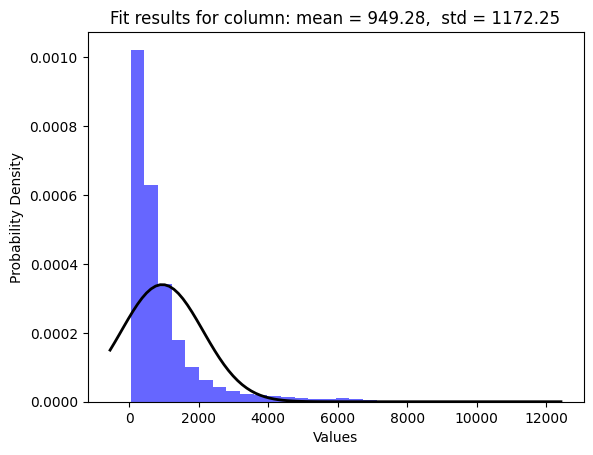

----------------------------------------------------------------------
중국인체류인구수_LONG_FOREIGNER


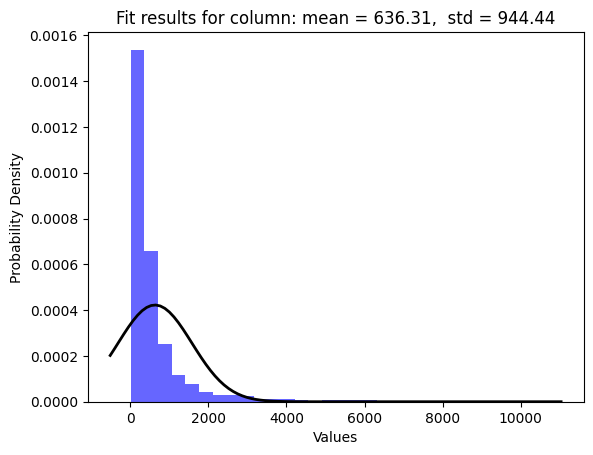

----------------------------------------------------------------------
중국외외국인체류인구수_LONG_FOREIGNER


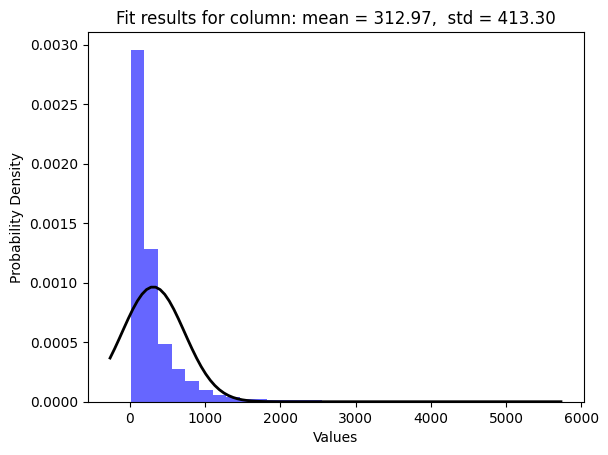

----------------------------------------------------------------------
총생활인구수_TEMP_FOREIGNER


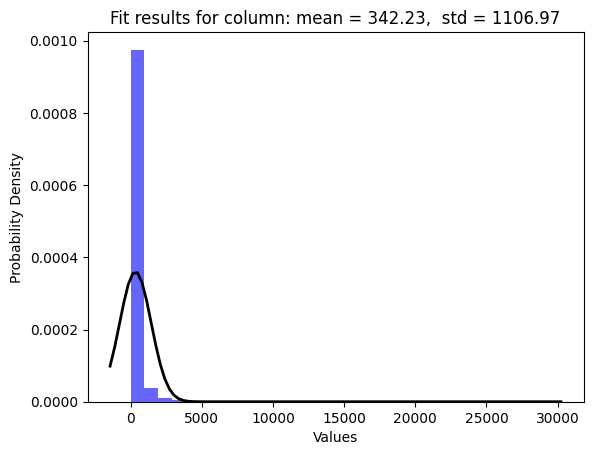

----------------------------------------------------------------------
중국인체류인구수_TEMP_FOREIGNER


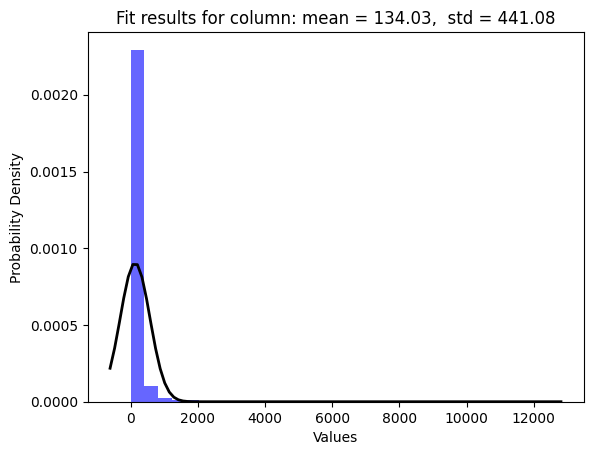

----------------------------------------------------------------------
중국외외국인체류인구수_TEMP_FOREIGNER


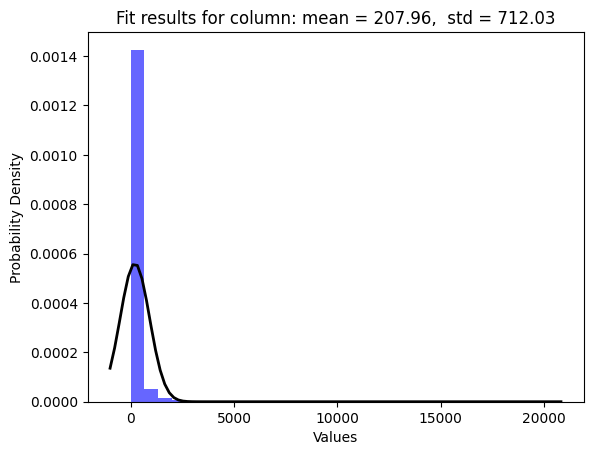

----------------------------------------------------------------------


In [4]:
def fitNormalDistribution(data, columnName):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)
    # Plot the histogram.
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results for column: mean = %.2f,  std = %.2f" % (mu, std) #%s, columnName would make it prettier but issues with Hangul encoding
    print(columnName)
    plt.title(title)
    plt.ylabel('Probability Density')
    plt.xlabel('Values')
    plt.show()
    print('-' * 70)
    
    return mu, std

# Read the aggregated data.
file_pathRead = "../Dataset/PabloTask_AggregatedDataframe.csv"
df = pd.read_csv(file_pathRead, index_col=False)

# Columns to analyze. 
df_statistics = pd.DataFrame(columns=['Feature', 'Mean', 'Standard Deviation'])
for column in df.columns.to_list():                                         #Ideally it should be third one to last, df.shape[1]?
    mean, deviation = fitNormalDistribution(df[column].to_numpy(), column)
    df_row = pd.DataFrame([[column, mean, deviation]], columns=['Feature', 'Mean', 'Standard Deviation'])
    df_statistics = pd.concat([df_statistics, df_row], ignore_index=True)
        

# Now knowing mean and std for each column, convert the human flow values into Z-scores based on that distribution.

In [67]:
df_statistics.head()

,Feature,Mean,Standard Deviation
0,기준일ID,2.019376e+05,161.871439
1,행정동코드,1.143320e+07,191667.859955
2,총생활인구수,2.512588e+04,12552.022293
3,남자0세부터9세생활인구수,8.299405e+02,493.216052
4,남자10세부터14세생활인구수,4.437624e+02,294.195757


In [68]:
cols = df.columns
cols = cols[2:]    # 기준일, 행정동코드 제외
cols

Index(['총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수',
       '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '남자30세부터34세생활인구수',
       '남자35세부터39세생활인구수', '남자40세부터44세생활인구수', '남자45세부터49세생활인구수',
       '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '남자60세부터64세생활인구수',
       '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수',
       '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수',
       '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수',
       '여자45세부터49세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수',
       '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       '총생활인구수_LONG_FOREIGNER', '중국인체류인구수_LONG_FOREIGNER',
       '중국외외국인체류인구수_LONG_FOREIGNER', '총생활인구수_TEMP_FOREIGNER',
       '중국인체류인구수_TEMP_FOREIGNER', '중국외외국인체류인구수_TEMP_FOREIGNER'],
      dtype='object')

In [69]:
mean_std = df.agg(['mean', 'std'])

# Z-score calculate
def z_score(x):
    return (x - mean_std.loc['mean', x.name]) / mean_std.loc['std', x.name]

zScores = df.copy()
zScores.loc[:, cols] = zScores.loc[:, cols].apply(z_score)    # 정규화 적용

zScores['행정동코드'] = zScores['행정동코드'].astype(int).astype(str) # 코드 일치화
zScores

,기준일ID,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,총생활인구수_LONG_FOREIGNER,중국인체류인구수_LONG_FOREIGNER,중국외외국인체류인구수_LONG_FOREIGNER,총생활인구수_TEMP_FOREIGNER,중국인체류인구수_TEMP_FOREIGNER,중국외외국인체류인구수_TEMP_FOREIGNER
0,201701,11110515,-0.731126,-0.603536,-0.355553,-0.689449,-0.240806,-0.372264,-0.416703,-0.461398,...,-1.073713,-1.185504,-1.026471,-0.661156,-0.468468,-0.482288,-0.226631,0.449328,0.742736,0.238794
1,201701,11110530,0.610996,-0.715011,-0.787347,-0.736600,0.272454,0.501252,1.048549,1.137543,...,0.062451,0.105120,-0.050343,0.649225,0.500641,0.046270,1.314229,1.644388,1.692390,1.508440
2,201701,11110540,-1.522595,-1.535469,-1.319257,-1.123064,-0.888292,-0.836749,-0.881455,-0.982513,...,-1.862957,-1.887819,-1.831069,-1.701862,-0.541390,-0.532162,-0.319492,0.257150,0.334091,0.193164
3,201701,11110550,-1.079305,-1.163255,-0.833148,-0.806410,-0.515887,-0.791364,-0.914273,-0.932239,...,-1.179713,-1.064101,-1.095441,-0.666455,-0.503570,-0.496935,-0.292721,-0.050166,-0.149259,0.014809
4,201701,11110560,-0.177694,-0.401269,0.045553,-0.148188,-0.152839,-0.525454,-0.601939,-0.600421,...,0.377648,0.353553,0.293852,1.227944,-0.416759,-0.481244,-0.082355,-0.118287,-0.246619,-0.030784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28403,202207,11140635,-0.844063,-0.490951,-0.785469,-1.030571,-0.778703,-0.713129,-0.667478,-0.613601,...,-0.899094,-0.758815,-0.791256,-0.350595,-0.481528,-0.513114,-0.193232,-0.188240,-0.230387,-0.150063
28404,202207,11140590,-0.155326,-1.208219,-1.124055,-0.718522,0.059961,0.052183,0.188575,0.329292,...,-0.373591,-0.680321,-0.791205,-1.046235,1.306991,0.708882,2.087130,1.987068,1.158649,2.371137
28405,202207,11230740,-0.185614,-0.823726,-0.589586,0.398090,2.001324,0.654695,-0.233702,-0.527310,...,-1.056257,-1.037306,-0.960305,-0.659916,3.016114,2.688147,2.411870,-0.039408,0.246136,-0.214114
28406,202207,11290760,-0.350666,-0.083289,0.308340,-0.185514,-0.321417,-0.540877,-0.474559,-0.420118,...,-0.154616,-0.109436,-0.010106,-0.259959,-0.544987,-0.516248,-0.366060,-0.271662,-0.263362,-0.259125


In [70]:
# 코드버전 저장
zScores.to_csv('../Dataset/Raw_Embeddings/HumanFlow_Embeddings_code.csv', index=False, encoding='utf-8-sig')

In [71]:
# 행정동 코드 -> 동 이름 변경
dong_mapping = pd.read_excel('../Dataset/dong_mapping.xlsx')
dong_mapping = dong_mapping.loc[1:, :]  # 첫번째행 제거

# 신사동 중복 처리
dong_mapping.loc[(dong_mapping['행정동명']=='신사동') & (dong_mapping['행자부행정동코드']=='11620685'), '행정동명'] = '신사동(관악)'
dong_mapping.loc[(dong_mapping['행정동명']=='신사동') & (dong_mapping['행자부행정동코드']=='11680510'), '행정동명'] = '신사동(강남)'

mapping_dict = dict(zip(dong_mapping['행자부행정동코드'], dong_mapping['행정동명']))
mapping_dict

zScores['행정동코드'] = zScores['행정동코드'].map(mapping_dict)

#zScores[zScores['행정동코드'].str.isdigit()]  # 변환 확인

zScores.head()

,기준일ID,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,총생활인구수_LONG_FOREIGNER,중국인체류인구수_LONG_FOREIGNER,중국외외국인체류인구수_LONG_FOREIGNER,총생활인구수_TEMP_FOREIGNER,중국인체류인구수_TEMP_FOREIGNER,중국외외국인체류인구수_TEMP_FOREIGNER
0,201701,청운효자동,-0.731126,-0.603536,-0.355553,-0.689449,-0.240806,-0.372264,-0.416703,-0.461398,...,-1.073713,-1.185504,-1.026471,-0.661156,-0.468468,-0.482288,-0.226631,0.449328,0.742736,0.238794
1,201701,사직동,0.610996,-0.715011,-0.787347,-0.736600,0.272454,0.501252,1.048549,1.137543,...,0.062451,0.105120,-0.050343,0.649225,0.500641,0.046270,1.314229,1.644388,1.692390,1.508440
2,201701,삼청동,-1.522595,-1.535469,-1.319257,-1.123064,-0.888292,-0.836749,-0.881455,-0.982513,...,-1.862957,-1.887819,-1.831069,-1.701862,-0.541390,-0.532162,-0.319492,0.257150,0.334091,0.193164
3,201701,부암동,-1.079305,-1.163255,-0.833148,-0.806410,-0.515887,-0.791364,-0.914273,-0.932239,...,-1.179713,-1.064101,-1.095441,-0.666455,-0.503570,-0.496935,-0.292721,-0.050166,-0.149259,0.014809
4,201701,평창동,-0.177694,-0.401269,0.045553,-0.148188,-0.152839,-0.525454,-0.601939,-0.600421,...,0.377648,0.353553,0.293852,1.227944,-0.416759,-0.481244,-0.082355,-0.118287,-0.246619,-0.030784


In [72]:
zScores['행정동코드'].unique()

array(['청운효자동', '사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동',
       '종로1.2.3.4가동', '종로5.6가동', '이화동', '혜화동', '창신1동', '창신2동', '창신3동',
       '숭인1동', '숭인2동', '소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동',
       '신당동', '다산동', '약수동', '청구동', '신당5동', '동화동', '황학동', '중림동', '후암동',
       '용산2가동', '남영동', '청파동', '원효로1동', '원효로2동', '효창동', '용문동', '한강로동',
       '이촌1동', '이촌2동', '이태원1동', '이태원2동', '한남동', '서빙고동', '보광동', '왕십리2동',
       '왕십리도선동', '마장동', '사근동', '행당1동', '행당2동', '응봉동', '금호1가동', '금호2.3가동',
       '금호4가동', '옥수동', '성수1가1동', '성수1가2동', '성수2가1동', '성수2가3동', '송정동',
       '용답동', '화양동', '군자동', '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '광장동',
       '자양1동', '자양2동', '자양3동', '자양4동', '구의1동', '구의2동', '구의3동', '용신동',
       '제기동', '전농1동', '전농2동', '답십리1동', '답십리2동', '장안1동', '장안2동', '청량리동',
       '회기동', '휘경1동', '휘경2동', '이문1동', '이문2동', '면목2동', '면목4동', '면목5동',
       '면목본동', '면목7동', '면목3.8동', '상봉1동', '상봉2동', '중화1동', '중화2동', '묵1동',
       '묵2동', '망우본동', '망우3동', '신내1동', '신내2동', '성북동', '삼선동', '동선동', '돈암1동',
    

In [73]:
# 한글버전 저장
zScores.to_csv('../Dataset/Raw_Embeddings/HumanFlow_Embeddings_kor.csv', index=False, encoding='utf-8-sig')

In [74]:
# ex = pd.read_csv('../Dataset/Embeddings/HumanFlow_Embeddings_code.csv')
# ex

# 2. Extract the prediction variables, Occupancy rate, revenue, and reservation, from the preprocess_AirBnB.csv file. Then, analyze their correlations with the processed human flow data. Specifically, compare domestic human flow, long-term foreigner flow, and short-term foreigner flow with Occupancy rate, revenue, and reservation values.

In [75]:
# Read the preprocessed data.
file_pathRead = "../Dataset/preprocess_AirBnB.csv"
Air_df = pd.read_csv(file_pathRead, index_col=False)

/tmp/ipykernel_1090304/290299934.py:3: DtypeWarning: Columns (13,20,28,39,41,42,43,54,55,64,67,75,76,78,79,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  Air_df = pd.read_csv(file_pathRead, index_col=False)


In [76]:
Air_df.head()

,Property ID,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),Number of Reservations,Reservation Days,Available Days,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
0,ab-658150652762678230,2022-06-01,0.033,23.0,0.0,23.00,0.00,1.0,1.0,29.0,...,NaN,"[""kitchen"", ""wireless_internet"", ""laptop-frien...",NaN,False,NaN,NaN,6.581507e+17,27975258.0,NaN,NaN
1,ab-658150652762678230,2022-07-01,0.400,360.0,469655.2,36.00,46965.52,6.0,10.0,15.0,...,NaN,"[""kitchen"", ""wireless_internet"", ""laptop-frien...",NaN,False,NaN,NaN,6.581507e+17,27975258.0,NaN,NaN
2,ab-658169356486186539,2022-06-01,0.000,0.0,0.0,NaN,NaN,0.0,0.0,30.0,...,NaN,"[""kitchen"", ""wireless_internet"", ""hair-dryer"",...",NaN,False,NaN,NaN,6.581694e+17,38621584.0,NaN,NaN
3,ab-658169356486186539,2022-07-01,0.000,0.0,0.0,NaN,NaN,0.0,0.0,31.0,...,NaN,"[""kitchen"", ""wireless_internet"", ""hair-dryer"",...",NaN,False,NaN,NaN,6.581694e+17,38621584.0,NaN,NaN
4,ab-658213094852126788,2022-07-01,0.774,1063.0,1388000.0,44.29,57833.33,14.0,24.0,7.0,...,NaN,"[""kitchen"", ""wireless_internet"", ""laptop-frien...",NaN,False,NaN,NaN,6.582131e+17,454059471.0,NaN,NaN


In [77]:
Air_df.columns

Index(['Property ID', 'Reporting Month', 'Occupancy Rate', 'Revenue (USD)',
       'Revenue (Native)', 'ADR (USD)', 'ADR (Native)',
       'Number of Reservations', 'Reservation Days', 'Available Days',
       'Blocked Days', 'Active', 'Scraped During Month',
       'HomeAway Property Manager', 'geometry', 'index_right', 'ADM_NM',
       'Listing Title', 'Property Type', 'Listing Type', 'Created Date',
       'Last Scraped Date', 'Country', 'State', 'City', 'Zipcode',
       'Neighborhood', 'Metropolitan Statistical Area', 'Currency Native',
       'Average Daily Rate (USD)', 'Average Daily Rate (Native)',
       'Annual Revenue LTM (USD)', 'Annual Revenue LTM (Native)',
       'Occupancy Rate LTM', 'Number of Bookings LTM', 'Number of Reviews',
       'Bedrooms', 'Bathrooms', 'Max Guests', 'Calendar Last Updated',
       'Response Rate', 'Airbnb Response Time (Text)', 'Airbnb Superhost',
       'HomeAway Premier Partner', 'Cancellation Policy',
       'Security Deposit (USD)', 'Securi

In [78]:
target_df = Air_df[['Reporting Month', 'ADM_NM', 'Occupancy Rate', 'Revenue (USD)', 'Number of Reservations']]
target_df.head(10)

,Reporting Month,ADM_NM,Occupancy Rate,Revenue (USD),Number of Reservations
0,2022-06-01,혜화동,0.033,23.00,1.0
1,2022-07-01,혜화동,0.400,360.00,6.0
2,2022-06-01,사근동,0.000,0.00,0.0
3,2022-07-01,사근동,0.000,0.00,0.0
4,2022-07-01,연남동,0.774,1063.00,14.0
5,2022-07-01,연남동,0.645,418.00,10.0
6,2022-07-01,연남동,0.677,752.00,11.0
7,2022-07-01,우이동,0.387,1223.00,9.0
8,2022-06-01,사직동,0.067,550.57,1.0
9,2022-07-01,사직동,0.161,1376.43,1.0


In [79]:
# 동별로 결과를 묶기
result_df = target_df.groupby(['Reporting Month', 'ADM_NM']).agg({
    'Occupancy Rate': 'mean',
    'Revenue (USD)': 'sum',
    'Number of Reservations': 'sum'
}).reset_index()

result_df

,Reporting Month,ADM_NM,Occupancy Rate,Revenue (USD),Number of Reservations
0,2014-11-01,가락1동,0.016500,32.00,1.0
1,2014-11-01,가락2동,0.000000,0.00,0.0
2,2014-11-01,가산동,0.000000,0.00,0.0
3,2014-11-01,가양1동,0.210500,840.00,2.0
4,2014-11-01,가양2동,0.233000,261.92,1.0
...,...,...,...,...,...
37091,2022-07-01,효창동,0.209875,8802.74,44.0
37092,2022-07-01,후암동,0.292348,113240.44,387.0
37093,2022-07-01,휘경1동,0.348942,18969.15,154.0
37094,2022-07-01,휘경2동,0.268609,4532.20,41.0


In [80]:
# 날짜 범위 생성
date_range = pd.date_range(start='2017-01-01', end='2022-07-01', freq='MS')
date_range = date_range.strftime('%Y-%m-%d').tolist()  # 문자열로 변경
print(len(date_range))

# 동 이름과 날짜 범위의 모든 조합 생성
dong_names = list(result_df['ADM_NM'].unique())
print(len(dong_names))

full_index = pd.MultiIndex.from_product([dong_names, date_range], names=['ADM_NM', 'Reporting Month'])
#full_index

# 기존 데이터프레임에서 인덱스 생성
existing_index = pd.MultiIndex.from_frame(result_df[['ADM_NM', 'Reporting Month']])
#existing_index

# 존재하지 않는 조합 찾기
missing_combinations = set(full_index) - set(existing_index)

len(missing_combinations)

67
424


539

In [81]:
# 누락된 부분 값 채우기
missing_combinations_df = pd.DataFrame(
    list(missing_combinations), 
    columns=['ADM_NM', 'Reporting Month']
)

fills = ['Occupancy Rate', 'Revenue (USD)',	'Number of Reservations']
for c in fills:
    missing_combinations_df[c] = 0
    
missing_combinations_df['Reporting Month'] = missing_combinations_df['Reporting Month'].astype(str)

missing_combinations_df

,ADM_NM,Reporting Month,Occupancy Rate,Revenue (USD),Number of Reservations
0,쌍문2동,2018-02-01,0,0,0
1,상계8동,2021-08-01,0,0,0
2,중계본동,2021-08-01,0,0,0
3,마천2동,2019-10-01,0,0,0
4,방학3동,2021-02-01,0,0,0
...,...,...,...,...,...
534,마천2동,2021-03-01,0,0,0
535,쌍문1동,2021-01-01,0,0,0
536,둔촌1동,2020-01-01,0,0,0
537,신월6동,2021-11-01,0,0,0


In [82]:
result = pd.concat([result_df, missing_combinations_df])
result = result[result['Reporting Month'].isin(date_range)]

In [83]:
result = result.groupby(['Reporting Month', 'ADM_NM']).agg({
    'Occupancy Rate': 'mean',
    'Revenue (USD)': 'sum',
    'Number of Reservations': 'sum'
}).reset_index()

result['Reporting Month'] = pd.to_datetime(result['Reporting Month']).dt.strftime('%Y%m')
result

,Reporting Month,ADM_NM,Occupancy Rate,Revenue (USD),Number of Reservations
0,201701,가락1동,0.000000,0.00,0.0
1,201701,가락2동,0.000000,0.00,0.0
2,201701,가락본동,0.249571,4319.67,30.0
3,201701,가리봉동,0.200000,515.00,5.0
4,201701,가산동,0.000000,0.00,0.0
...,...,...,...,...,...
28403,202207,효창동,0.209875,8802.74,44.0
28404,202207,후암동,0.292348,113240.44,387.0
28405,202207,휘경1동,0.348942,18969.15,154.0
28406,202207,휘경2동,0.268609,4532.20,41.0


# 3. Visualize the correlation analysis using the sns.heatmap library and summarize the variables with strong correlations.

In [84]:
zScores['기준일ID'] = zScores['기준일ID'].astype(str)

# 데이터프레임 병합
merged_df = pd.merge(
    result,
    zScores,
    how='inner',  # 병합 방식: inner, left, right, outer 중 선택
    left_on=['Reporting Month', 'ADM_NM'],  # result의 기준 열
    right_on=['기준일ID', '행정동코드']  # zScores의 기준 열
)

# 불필요한 병합 열 삭제 (필요 시)
merged_df = merged_df.drop(columns=['기준일ID', '행정동코드'])

merged_df

,Reporting Month,ADM_NM,Occupancy Rate,Revenue (USD),Number of Reservations,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,...,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,총생활인구수_LONG_FOREIGNER,중국인체류인구수_LONG_FOREIGNER,중국외외국인체류인구수_LONG_FOREIGNER,총생활인구수_TEMP_FOREIGNER,중국인체류인구수_TEMP_FOREIGNER,중국외외국인체류인구수_TEMP_FOREIGNER
0,201701,가락1동,0.000000,0.00,0.0,-1.010688,-1.191521,-1.096652,-1.123463,-0.852340,...,-0.828315,-0.699584,-0.913919,-1.152864,-0.261996,-0.101066,-0.512149,-0.285645,-0.287857,-0.265426
1,201701,가락2동,0.000000,0.00,0.0,0.455201,0.372574,0.780654,0.733386,0.210089,...,1.180016,1.098889,0.510422,0.524073,-0.504250,-0.397310,-0.522301,-0.258558,-0.293579,-0.219771
2,201701,가락본동,0.249571,4319.67,30.0,1.476343,1.217800,0.945488,1.306939,0.912805,...,2.528623,2.339442,1.542805,0.973507,-0.036929,0.041987,-0.200686,-0.183112,-0.250511,-0.129156
3,201701,가리봉동,0.200000,515.00,5.0,-1.282920,-1.418984,-1.280756,-1.298468,-0.850779,...,-1.497970,-1.418586,-1.368747,-1.377068,2.321933,3.124328,-0.553740,-0.037674,0.046918,-0.087297
4,201701,가산동,0.000000,0.00,0.0,2.574238,0.183479,-0.433758,0.103678,1.884987,...,1.493897,0.788970,0.695680,-0.145860,4.276567,4.923538,0.878779,0.441153,0.546458,0.347673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27934,202207,효창동,0.209875,8802.74,44.0,-1.237583,-1.103635,-0.935124,-0.973859,-0.871491,...,-1.487296,-1.507590,-1.492048,-1.274689,-0.632328,-0.593025,-0.438341,-0.258972,-0.292556,-0.221360
27935,202207,후암동,0.292348,113240.44,387.0,-0.927821,-0.702287,-0.599980,-0.913086,-0.717531,...,-1.246643,-1.010408,-1.135288,-0.899947,-0.294504,-0.378983,0.030718,-0.013089,-0.187617,0.095660
27936,202207,휘경1동,0.348942,18969.15,154.0,-0.681501,-1.134381,-0.998347,-0.515919,0.547382,...,-1.162937,-1.202111,-0.948954,-0.922646,1.672407,1.676736,0.911911,0.022168,0.341718,-0.177578
27937,202207,휘경2동,0.268609,4532.20,41.0,-0.411848,-0.531041,-0.447025,-0.085316,0.545518,...,-0.678151,-0.741123,-0.426079,-0.489823,0.233376,0.119305,0.389297,-0.124651,-0.007707,-0.189368


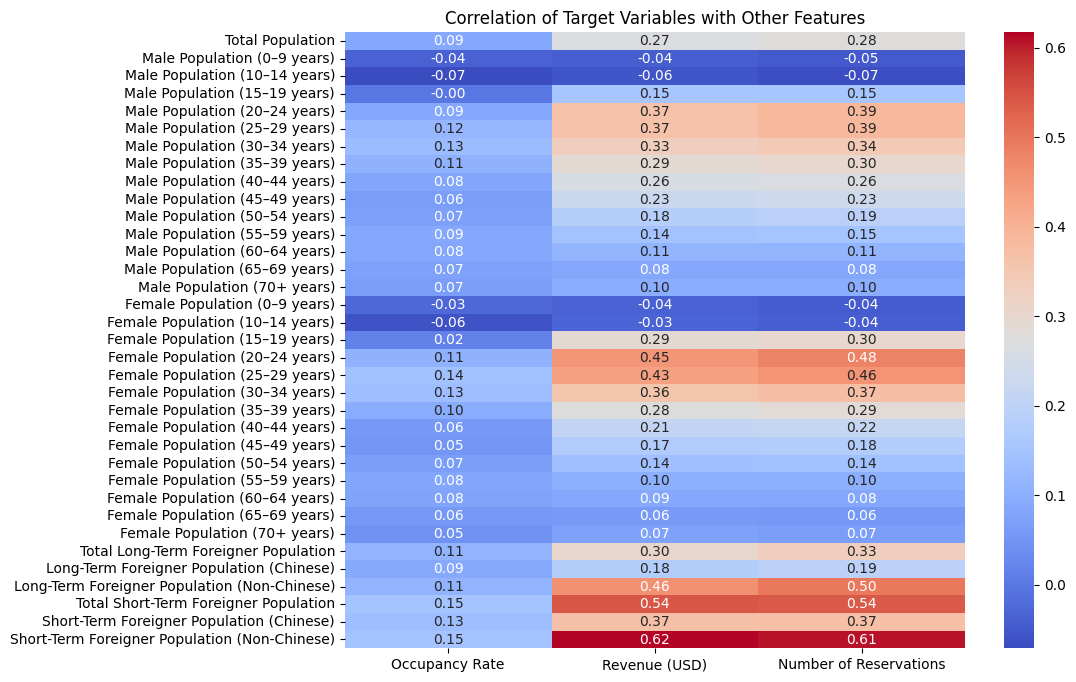

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reporting Month와 ADM_NM 제외
data_for_heatmap = merged_df.drop(columns=['Reporting Month', 'ADM_NM'])

# 열 이름 변환
translated_columns = [
    'Occupancy Rate', 'Revenue (USD)', 'Number of Reservations', 'Total Population',
    'Male Population (0–9 years)', 'Male Population (10–14 years)', 'Male Population (15–19 years)',
    'Male Population (20–24 years)', 'Male Population (25–29 years)', 'Male Population (30–34 years)',
    'Male Population (35–39 years)', 'Male Population (40–44 years)', 'Male Population (45–49 years)',
    'Male Population (50–54 years)', 'Male Population (55–59 years)', 'Male Population (60–64 years)',
    'Male Population (65–69 years)', 'Male Population (70+ years)', 'Female Population (0–9 years)',
    'Female Population (10–14 years)', 'Female Population (15–19 years)', 'Female Population (20–24 years)',
    'Female Population (25–29 years)', 'Female Population (30–34 years)', 'Female Population (35–39 years)',
    'Female Population (40–44 years)', 'Female Population (45–49 years)', 'Female Population (50–54 years)',
    'Female Population (55–59 years)', 'Female Population (60–64 years)', 'Female Population (65–69 years)',
    'Female Population (70+ years)', 'Total Long-Term Foreigner Population',
    'Long-Term Foreigner Population (Chinese)', 'Long-Term Foreigner Population (Non-Chinese)',
    'Total Short-Term Foreigner Population', 'Short-Term Foreigner Population (Chinese)',
    'Short-Term Foreigner Population (Non-Chinese)'
]

# 데이터프레임 열 이름 변경
data_for_heatmap.columns = translated_columns

# 특정 열 지정
target_columns = ['Occupancy Rate', 'Revenue (USD)', 'Number of Reservations']

# 대상 열 제외
remaining_columns = [col for col in data_for_heatmap.columns if col not in target_columns]

# 상관관계 계산
correlation_matrix = data_for_heatmap[target_columns + remaining_columns].corr()

# 상관관계 중 특정 열과의 상관관계만 추출
correlation_with_targets = correlation_matrix[target_columns].drop(target_columns)

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_targets, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Target Variables with Other Features')
plt.show()